# Curvilineargrid Basics

This is the basic introduction for using `meshkernel` library for generating curvilinear grids.

At the very beginning, the necessary libraries have to be imported.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from meshkernel import (
    CurvilinearParameters,
    MakeGridParameters,
    GeometryList,
    MeshKernel,
    SplinesToCurvilinearParameters,
    OrthogonalizationParameters,
)

Define a function for creating a mesh kernel instance with a curvilinear grid generated using curvilinear_compute_transfinite_from_splines:
+ We first create the splines used for curvilinear grid generation. Each spline is separated by -999.0
+ We can set the number of m and n in a new CurvilinearParameters instance
+ We now create a new instance of the MeshKernel library
+ And used the transfinite algorithm to create a new curvilinear grid

In [2]:
def create_mk_instance_with_curvilinear_grid_from_transfinite_method():
    r"""A function for creating an instance of meshkernel with a curvilinear grid."""
    mk = MeshKernel()

    separator = -999.0
    splines_x = np.array(
        [
            2.0,
            4.0,
            7.0,
            separator,
            -1.0,
            1.0,
            5.0,
            separator,
            3.0,
            -2.0,
            separator,
            7.0,
            4.0,
        ],
        dtype=np.double,
    )
    splines_y = np.array(
        [
            1.0,
            3.0,
            4.0,
            separator,
            4.0,
            6.0,
            7.0,
            separator,
            1.0,
            6.0,
            separator,
            3.0,
            8.0,
        ],
        dtype=np.double,
    )
    splines = GeometryList(splines_x, splines_y)

    curvilinear_parameters = CurvilinearParameters()
    curvilinear_parameters.n_refinement = 10
    curvilinear_parameters.m_refinement = 10

    mk.curvilinear_compute_transfinite_from_splines(splines, curvilinear_parameters)

    return mk

Define a function for creating a rectangular curvilinear grid

In [3]:
def create_mk_instance_with_a_rectangular_curvilinear_grid(num_columns=3, num_rows=3):
    r"""A local function for creating an instance of meshkernel with a rectangular curvilinear grid."""
    mk = MeshKernel()

    # Create an instance of MakeGridParameters and set the values
    make_grid_parameters = MakeGridParameters()
    make_grid_parameters.num_columns = num_columns
    make_grid_parameters.num_rows = num_rows
    make_grid_parameters.angle = 0.0
    make_grid_parameters.origin_x = 0.0
    make_grid_parameters.origin_y = 0.0
    make_grid_parameters.block_size_x = 10.0
    make_grid_parameters.block_size_y = 10.0

    mk.curvilinear_compute_rectangular_grid(make_grid_parameters)

    return mk

## Generate a curvilinear grid using the transfinite interpolation method

In [4]:
curvilinear_grid_transfinite = (
    create_mk_instance_with_curvilinear_grid_from_transfinite_method().curvilineargrid_get()
)

Plot the result

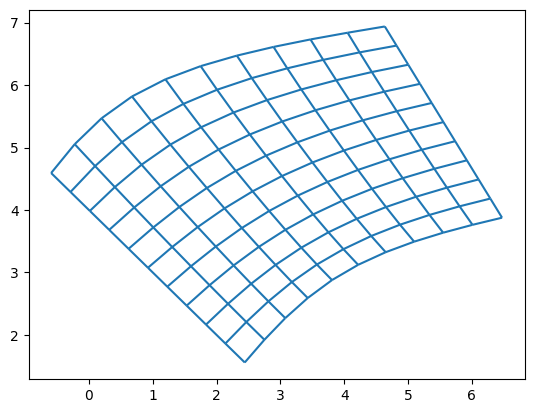

In [5]:
fig, ax = plt.subplots()
curvilinear_grid_transfinite.plot_edges(ax)

## Generate a curvilinear grid using the advancing front method

Define a function for creating a mesh kernel instance with a curvilinear grid generated using curvilinear_compute_orthogonal_from_splines:
+ We first create the splines for curvilinear grid generation. Each spline is separated by -999.0
+ We can set the number of m and n in a new CurvilinearParameters instance
+ For this algorithm we also need to set the additional parameters required for generating a curvilinear grid from splines
+ We can now use the advancing front algorithm to create a new curvilinear grid

In [6]:
mk = MeshKernel()

separator = -999.0
splines_x = np.array([-1.0, 2.0, 6.0, separator, 3.0, -2.0, separator], dtype=np.double)
splines_y = np.array([2.0, 5.0, 6.0, separator, 1.0, 6.0, separator], dtype=np.double)

splines_values = np.zeros_like(splines_x)
splines = GeometryList(splines_x, splines_y, splines_values)

curvilinearParameters = CurvilinearParameters()
curvilinearParameters.n_refinement = 10
curvilinearParameters.m_refinement = 10

splinesToCurvilinearParameters = SplinesToCurvilinearParameters()
splinesToCurvilinearParameters.aspect_ratio = 1.0
splinesToCurvilinearParameters.aspect_ratio_grow_factor = 1.0
splinesToCurvilinearParameters.average_width = 0.2
splinesToCurvilinearParameters.nodes_on_top_of_each_other_tolerance = 1e-4
splinesToCurvilinearParameters.min_cosine_crossing_angles = 0.95
splinesToCurvilinearParameters.check_front_collisions = 0
splinesToCurvilinearParameters.curvature_adapted_grid_spacing = 1
splinesToCurvilinearParameters.remove_skinny_triangles = 1

mk.curvilinear_compute_orthogonal_from_splines(
    splines, curvilinearParameters, splinesToCurvilinearParameters
)

curvilinear_grid_orthogonal = mk.curvilineargrid_get()

Plot the result

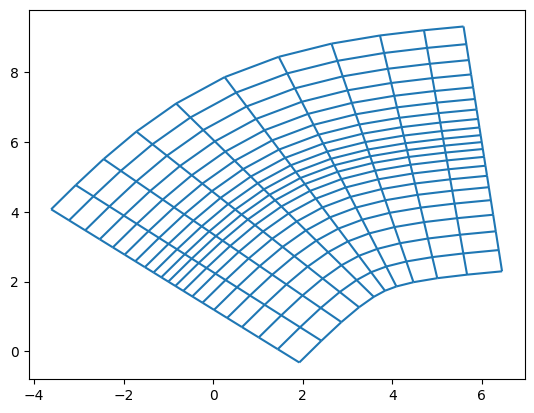

In [7]:
fig, ax = plt.subplots()
curvilinear_grid_orthogonal.plot_edges(ax)

## Refine/derefine a curvilinear mesh

Before refinement

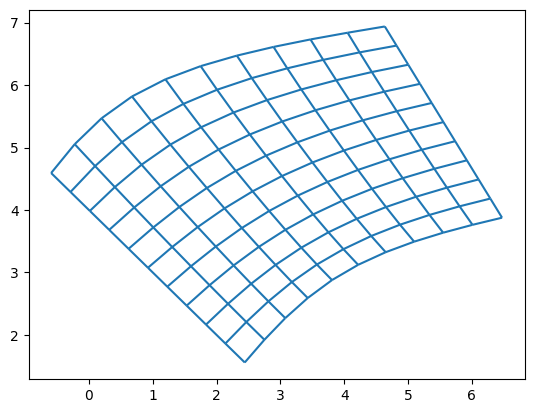

In [8]:
mk = create_mk_instance_with_curvilinear_grid_from_transfinite_method()
curvilinear_grid = mk.curvilineargrid_get()
fig, ax = plt.subplots()
curvilinear_grid.plot_edges(ax)

Refine by adding two horizontal grid lines for each row within two selected points and plot the results

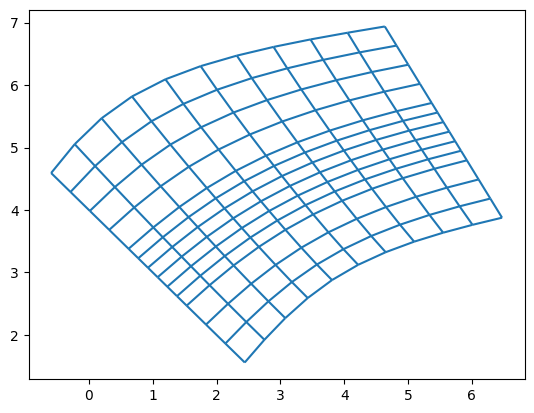

In [9]:
mk.curvilinear_refine(2.299, 4.612, 3.074, 3.684, 2)
curvilinear_grid = mk.curvilineargrid_get()
fig, ax = plt.subplots()
curvilinear_grid.plot_edges(ax)

Derefine by removing the grid lines on the same rows

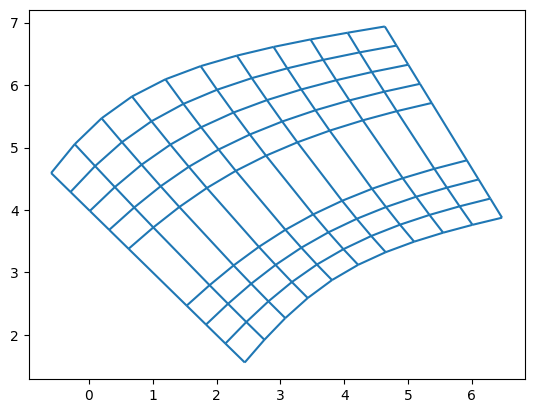

In [10]:
mk.curvilinear_derefine(2.299, 4.612, 3.074, 3.684)
curvilinear_grid = mk.curvilineargrid_get()
fig, ax = plt.subplots()
curvilinear_grid.plot_edges(ax)

## Make a rectangular grid

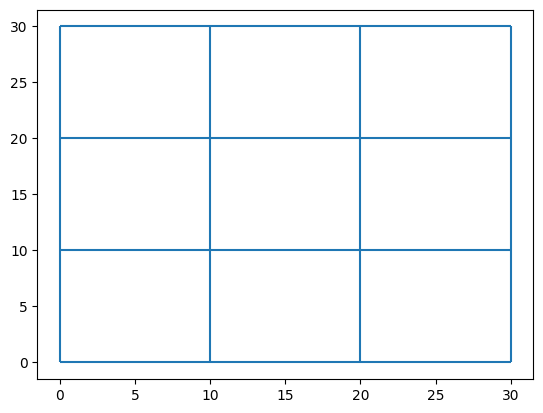

In [11]:
mk = create_mk_instance_with_a_rectangular_curvilinear_grid()
curvilinear_grid = mk.curvilineargrid_get()
fig, ax = plt.subplots()
curvilinear_grid.plot_edges(ax)

A rectangular grid can be also generated from a polygon. The polygon must be closed

In [12]:
node_x = np.array([2.5, 5.5, 3.5, 0.5, 2.5], dtype=np.double)
node_y = np.array([0.5, 3.0, 5.0, 2.5, 0.5], dtype=np.double)
geometry_list = GeometryList(node_x, node_y)

In [13]:
make_grid_parameters = MakeGridParameters()
make_grid_parameters.num_columns = 10
make_grid_parameters.num_rows = 10
make_grid_parameters.angle = 0.0
make_grid_parameters.origin_x = 0.0
make_grid_parameters.origin_y = 0.0
make_grid_parameters.block_size_x = 0.2
make_grid_parameters.block_size_y = 0.2

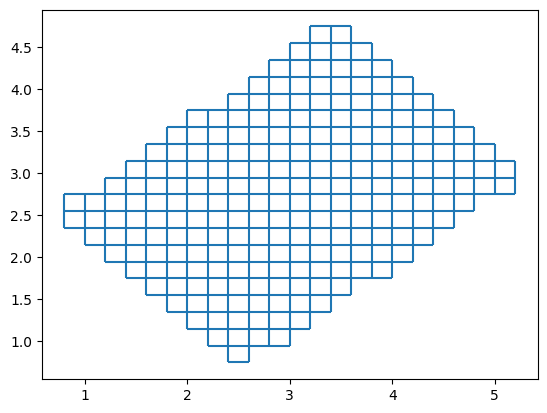

In [14]:
mk.curvilinear_compute_rectangular_grid_from_polygon(
    make_grid_parameters, geometry_list
)
curvilinear_grid = mk.curvilineargrid_get()
fig, ax = plt.subplots()
curvilinear_grid.plot_edges(ax)

## Generate a curvilinear grid using the nodes at the polygons's perimeter

Define the polygon and generate the curvilinear grid

In [15]:
node_x = np.array([2, 4, 6, 7, 8, 8, 8, 8, 7, 5, 3, 2, 2, 2, 2], dtype=np.double)
node_y = np.array([1, 1, 1, 1, 1, 1.2, 4, 6, 6, 6, 6, 6, 5, 3, 1], dtype=np.double)
geometry_list = GeometryList(node_x, node_y)
mk = MeshKernel()
mk.curvilinear_compute_transfinite_from_polygon(geometry_list, 0, 4, 7, False)

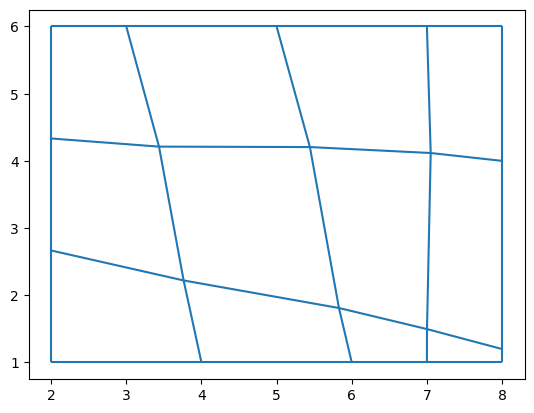

In [16]:
curvilinear_grid = mk.curvilineargrid_get()
fig, ax = plt.subplots()
curvilinear_grid.plot_edges(ax)

## Perform curvilinear grid orthogonalization

Move a node to make the grid non orthogonal and plot the result

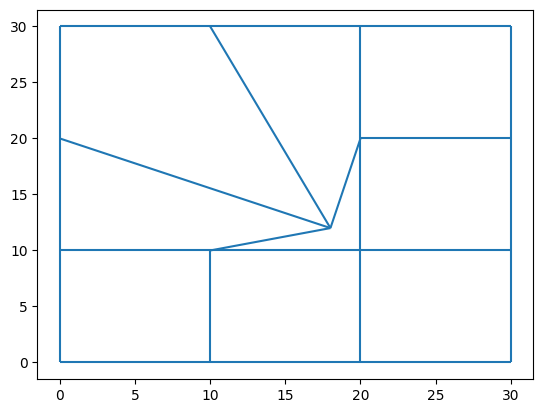

In [17]:
mk = create_mk_instance_with_a_rectangular_curvilinear_grid()
mk.curvilinear_move_node(10.0, 20.0, 18.0, 12.0)
curvilinear_grid = mk.curvilineargrid_get()
fig, ax = plt.subplots()
curvilinear_grid.plot_edges(ax)

Orthogonalize

In [18]:
# Assert a nodal position before orthogonalization
orthogonalization_parameters = OrthogonalizationParameters()
orthogonalization_parameters.outer_iterations = 1
orthogonalization_parameters.boundary_iterations = 25
orthogonalization_parameters.inner_iterations = 25
orthogonalization_parameters.orthogonalization_to_smoothing_factor = 0.95

# Initialize the curvilinear grid orthogonalization algorithm
# Sets the block to orthogonalize (in this case the lower left and upper right corners of the grid)
mk.curvilinear_orthogonalize(orthogonalization_parameters, 0.0, 0.0, 30.0, 30.0)


Plot the results after orthogonalization

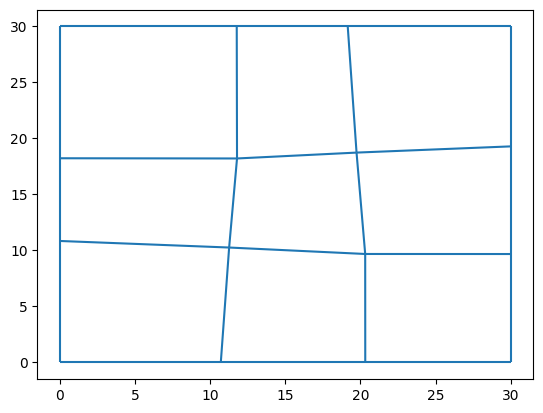

In [19]:
curvilinear_grid = mk.curvilineargrid_get()
fig, ax = plt.subplots()
curvilinear_grid.plot_edges(ax)

## Perform curvilinear grid orthogonalization with a frozen line

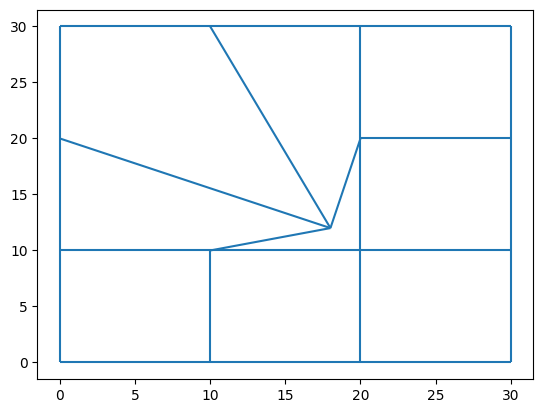

In [20]:
mk = create_mk_instance_with_a_rectangular_curvilinear_grid()
mk.curvilinear_move_node(10.0, 20.0, 18.0, 12.0)
curvilinear_grid = mk.curvilineargrid_get()
fig, ax = plt.subplots()
curvilinear_grid.plot_edges(ax)

Orthogonalize, but freeze the vertical grid line where the moved node is

In [21]:
# Assert a nodal position before orthogonalization
orthogonalization_parameters = OrthogonalizationParameters()
orthogonalization_parameters.outer_iterations = 1
orthogonalization_parameters.boundary_iterations = 25
orthogonalization_parameters.inner_iterations = 25
orthogonalization_parameters.orthogonalization_to_smoothing_factor = 0.95

# Freeze the vertical grid line where the moved node is
mk.curvilinear_frozen_line_add(10.0, 0.0, 10.0, 30.0)

# Orthogonalize
# Initialize the curvilinear grid orthogonalization algorithm
# Sets the block to orthogonalize (in this case the lower left and upper right corners of the grid)
mk.curvilinear_orthogonalize(orthogonalization_parameters, 0.0, 0.0, 30.0, 30.0)

Plot the results after orthogonalization

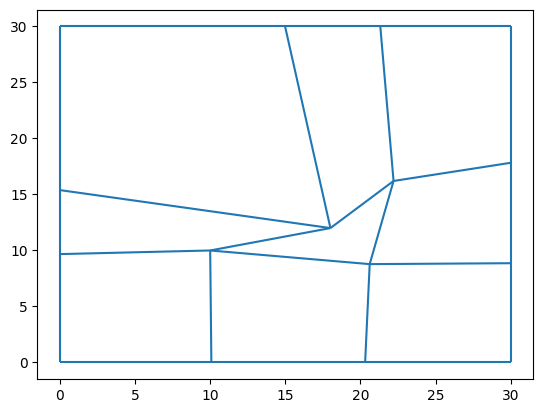

In [22]:
curvilinear_grid = mk.curvilineargrid_get()
fig, ax = plt.subplots()
curvilinear_grid.plot_edges(ax)

## Perform curvilinear grid smoothing

Move a node to make the grid non-smooth and plot the result

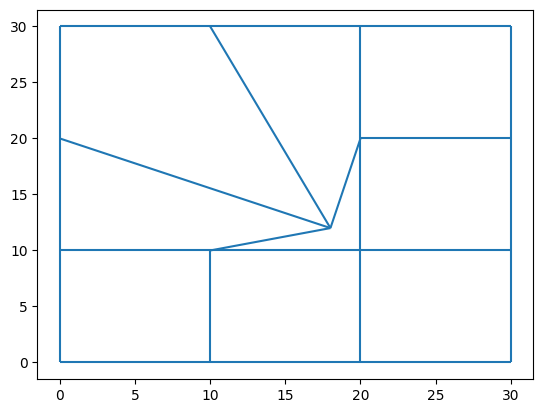

In [23]:
mk = create_mk_instance_with_a_rectangular_curvilinear_grid()
mk.curvilinear_move_node(10.0, 20.0, 18.0, 12.0)
curvilinear_grid = mk.curvilineargrid_get()
fig, ax = plt.subplots()
curvilinear_grid.plot_edges(ax)

Smoothing

In [24]:
mk.curvilinear_smoothing(10, 0.0, 0.0, 30.0, 30.0)

Plot the results after smoothing

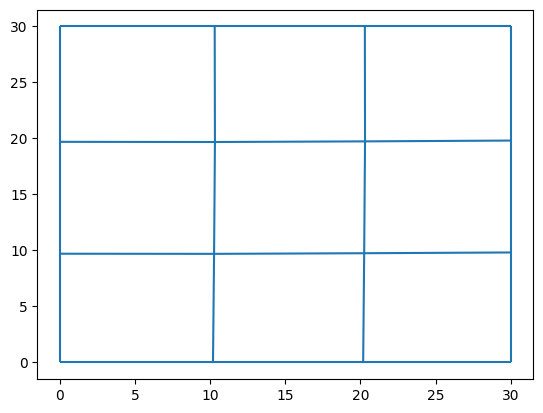

In [25]:
curvilinear_grid = mk.curvilineargrid_get()
fig, ax = plt.subplots()
curvilinear_grid.plot_edges(ax)

## Perform curvilinear directional curvilinear grid smoothing

Move a node to make the grid non-smooth and plot the result

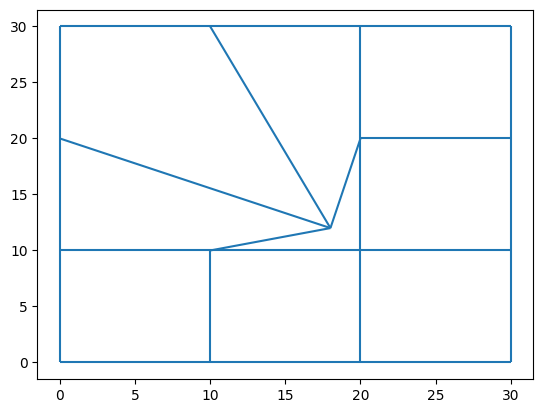

In [26]:
mk = create_mk_instance_with_a_rectangular_curvilinear_grid()
mk.curvilinear_move_node(10.0, 20.0, 18.0, 12.0)
curvilinear_grid = mk.curvilineargrid_get()
fig, ax = plt.subplots()
curvilinear_grid.plot_edges(ax)

Directional smoothing

In [27]:
mk.curvilinear_smoothing_directional(
    10,  # the number of smoothing iterations
    10.0,
    0.0,
    10.0,
    30.0,  # the grid line coordinates defining the smoothing direction
    0.0,
    0.0,
    30.0,
    30.0,
)  # the corner points of the block to smooth

Plot the results after directional smoothing

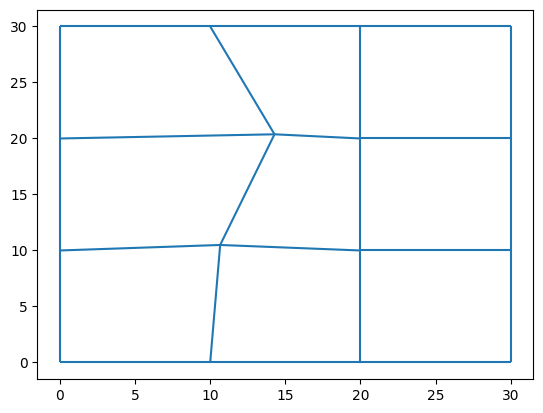

In [28]:
curvilinear_grid = mk.curvilineargrid_get()
fig, ax = plt.subplots()
curvilinear_grid.plot_edges(ax)

## Perform curvilinear grid line shifting

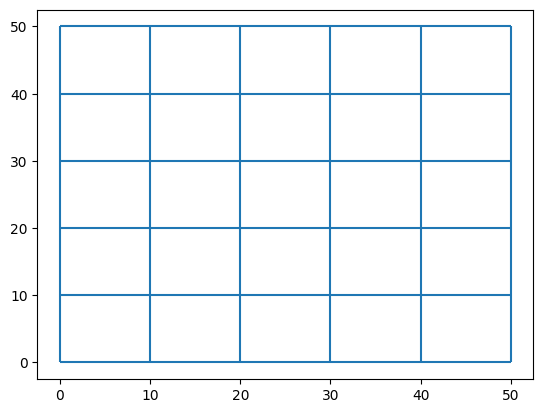

In [29]:
mk = create_mk_instance_with_a_rectangular_curvilinear_grid(5, 5)
curvilinear_grid = mk.curvilineargrid_get()
fig, ax = plt.subplots()
curvilinear_grid.plot_edges(ax)

Initialize line shifting and set the line to shift

In [30]:
mk.curvilinear_initialize_line_shift()
mk.curvilinear_set_line_line_shift(0.0, 0.0, 0.0, 50.0)

Set the grid block where to distribute the line shift

In [31]:
mk.curvilinear_set_block_line_shift(0.0, 0.0, 20.0, 50.0)

Move all nodes on the left side of the curvilinear grid to the left

In [32]:
mk.curvilinear_move_node_line_shift(0.0, 0.0, -50.0, 0.0)
mk.curvilinear_move_node_line_shift(0.0, 10.0, -50.0, 10.0)
mk.curvilinear_move_node_line_shift(0.0, 20.0, -50.0, 20.0)
mk.curvilinear_move_node_line_shift(0.0, 30.0, -50.0, 30.0)
mk.curvilinear_move_node_line_shift(0.0, 40.0, -50.0, 40.0)
mk.curvilinear_move_node_line_shift(0.0, 50.0, -50.0, 50.0)

Performs the line shift. Nodes not in the block specified above will not be shifted

In [33]:
mk.curvilinear_line_shift()

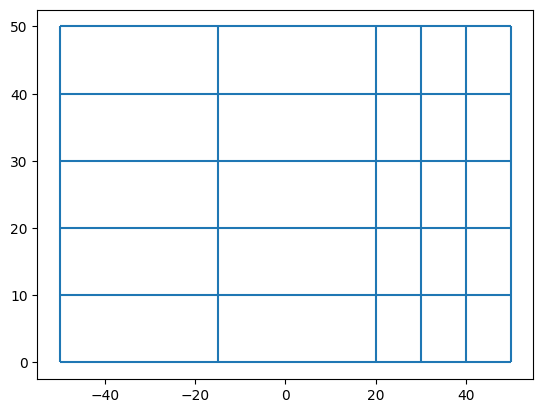

In [34]:
curvilinear_grid = mk.curvilineargrid_get()
fig, ax = plt.subplots()
curvilinear_grid.plot_edges(ax)

## Perform curvilinear insert a face

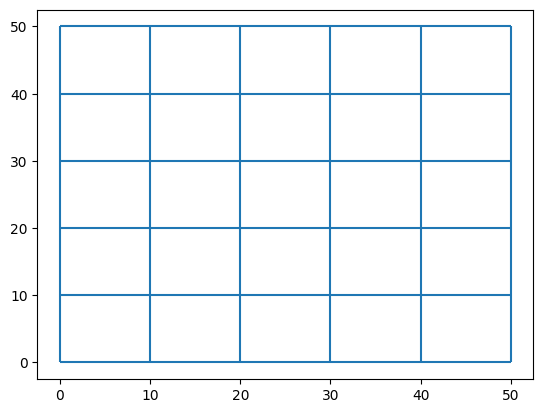

In [35]:
mk = create_mk_instance_with_a_rectangular_curvilinear_grid(5, 5)
curvilinear_grid = mk.curvilineargrid_get()
fig, ax = plt.subplots()
curvilinear_grid.plot_edges(ax)

Insert two faces

In [36]:
mk.curvilinear_insert_face(-10.0, 5.0)
mk.curvilinear_insert_face(-5.0, 10.0)

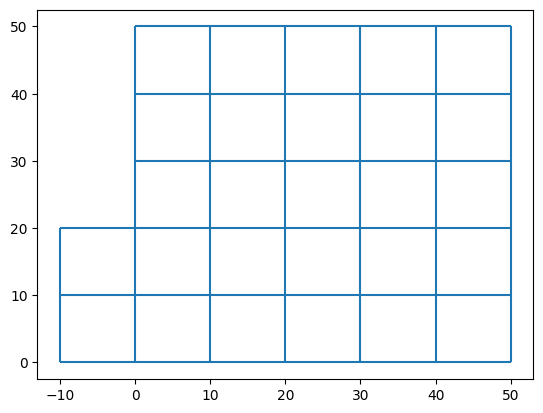

In [37]:
curvilinear_grid = mk.curvilineargrid_get()
fig, ax = plt.subplots()
curvilinear_grid.plot_edges(ax)

## Perform curvilinear delete a node

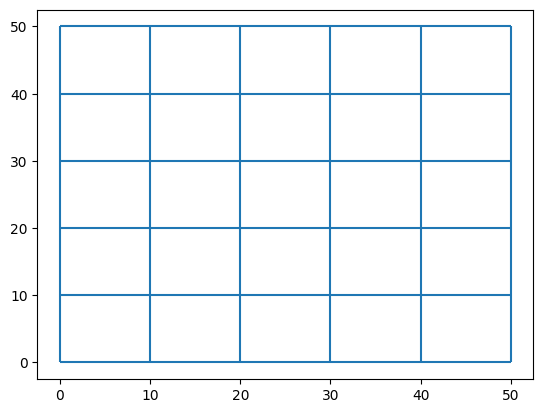

In [38]:
mk = create_mk_instance_with_a_rectangular_curvilinear_grid(5, 5)
curvilinear_grid = mk.curvilineargrid_get()
fig, ax = plt.subplots()
curvilinear_grid.plot_edges(ax)

Delete the corner node

In [39]:
mk.curvilinear_delete_node(0.0, 0.0)

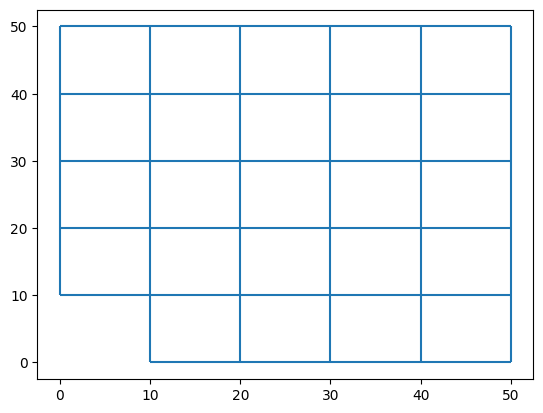

In [40]:
curvilinear_grid = mk.curvilineargrid_get()
fig, ax = plt.subplots()
curvilinear_grid.plot_edges(ax)

## Perform curvilinear line attraction/repulsion

Attracts the nodes within a block towards a defined line

In [41]:
mk = create_mk_instance_with_a_rectangular_curvilinear_grid(5, 5)
mk.curvilinear_line_attraction_repulsion(
    1.0,  # positive repels lines, here by 1 times the column width
    30.0,
    0.0,
    30.0,
    50.0,  # The line coordinate
    10.0,
    0.0,
    50.0,
    50.0,
)  # The affected block

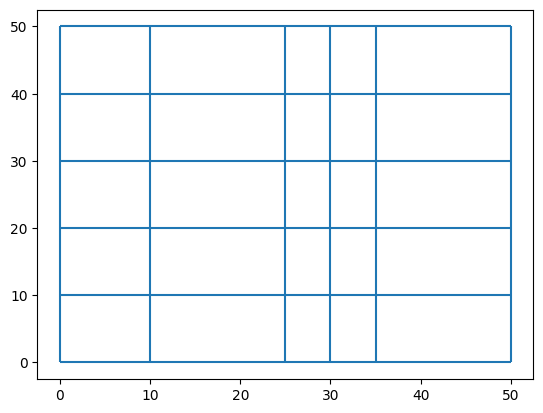

In [42]:
curvilinear_grid = mk.curvilineargrid_get()
fig, ax = plt.subplots()
curvilinear_grid.plot_edges(ax)

In [43]:
mk = create_mk_instance_with_a_rectangular_curvilinear_grid(5, 5)
mk.curvilinear_line_attraction_repulsion(
    -1.0,  # negative attracts lines, here by 0.5 times the column width
    30.0,
    0.0,
    30.0,
    50.0,  # The line coordinate
    10.0,
    0.0,
    50.0,
    50.0,
)  # The affected block

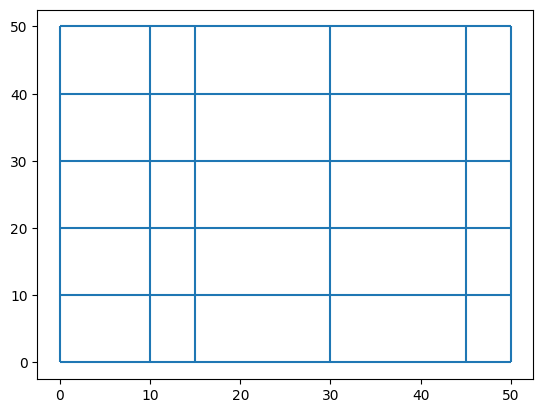

In [44]:
curvilinear_grid = mk.curvilineargrid_get()
fig, ax = plt.subplots()
curvilinear_grid.plot_edges(ax)

## Perform curvilinear line mirror

Mirrow the left gridline by 2 times the column width

In [45]:
mk = create_mk_instance_with_a_rectangular_curvilinear_grid(5, 5)
# the mirroring factor, the number of grid lines to mirror and the gridline to mirror 
mk.curvilinear_line_mirror(2.0, 1, 0.0, 0.0, 0.0, 50.0)  

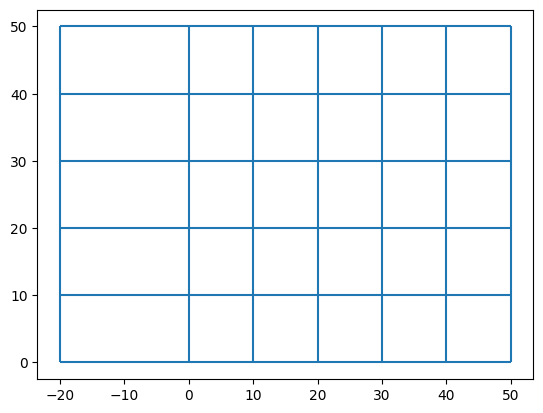

In [46]:
curvilinear_grid = mk.curvilineargrid_get()
fig, ax = plt.subplots()
curvilinear_grid.plot_edges(ax)